5
10
50
100
500
1000


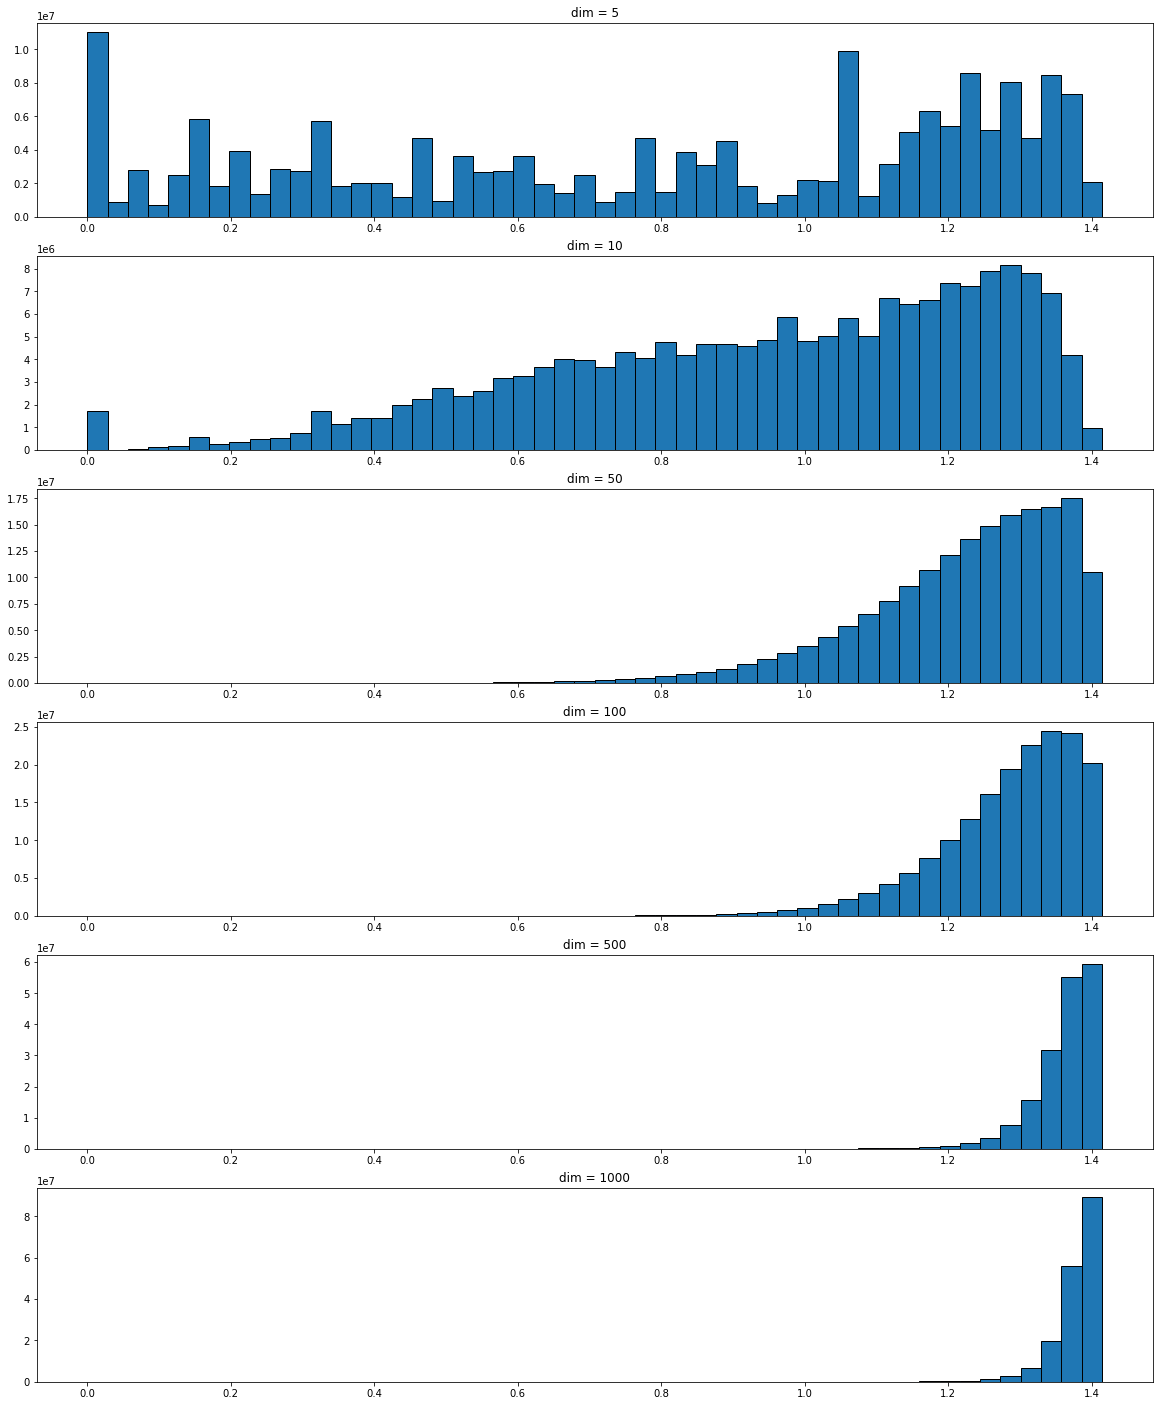

In [7]:
# how does the interpoint distance change as you use a thicker TF-IDF ?


from sklearn.datasets import fetch_20newsgroups
from scipy.spatial.distance import pdist, squareform
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

dim = [5, 10, 50, 100 , 500, 1000 ]

fig, axs = plt.subplots(len(dim), 1, figsize=(20,25))

distance_distribution = []

for i in range(len(dim)):
    print(dim[i])
    vectorizer = TfidfVectorizer(max_features = dim[i],stop_words='english') # m
    X_tfidf = vectorizer.fit_transform(X).toarray()
    distdist =  pdist(X_tfidf, metric='euclidean') 
    distance_distribution.append(distdist)

    axs[i].set_title('dim = ' + str(dim[i]))
    axs[i].hist(distdist, bins=50, edgecolor='k')

plt.savefig('visuals/dim+dists-20newsgroups.png')

0.1
0.2
0.4
0.6
0.8
1.0


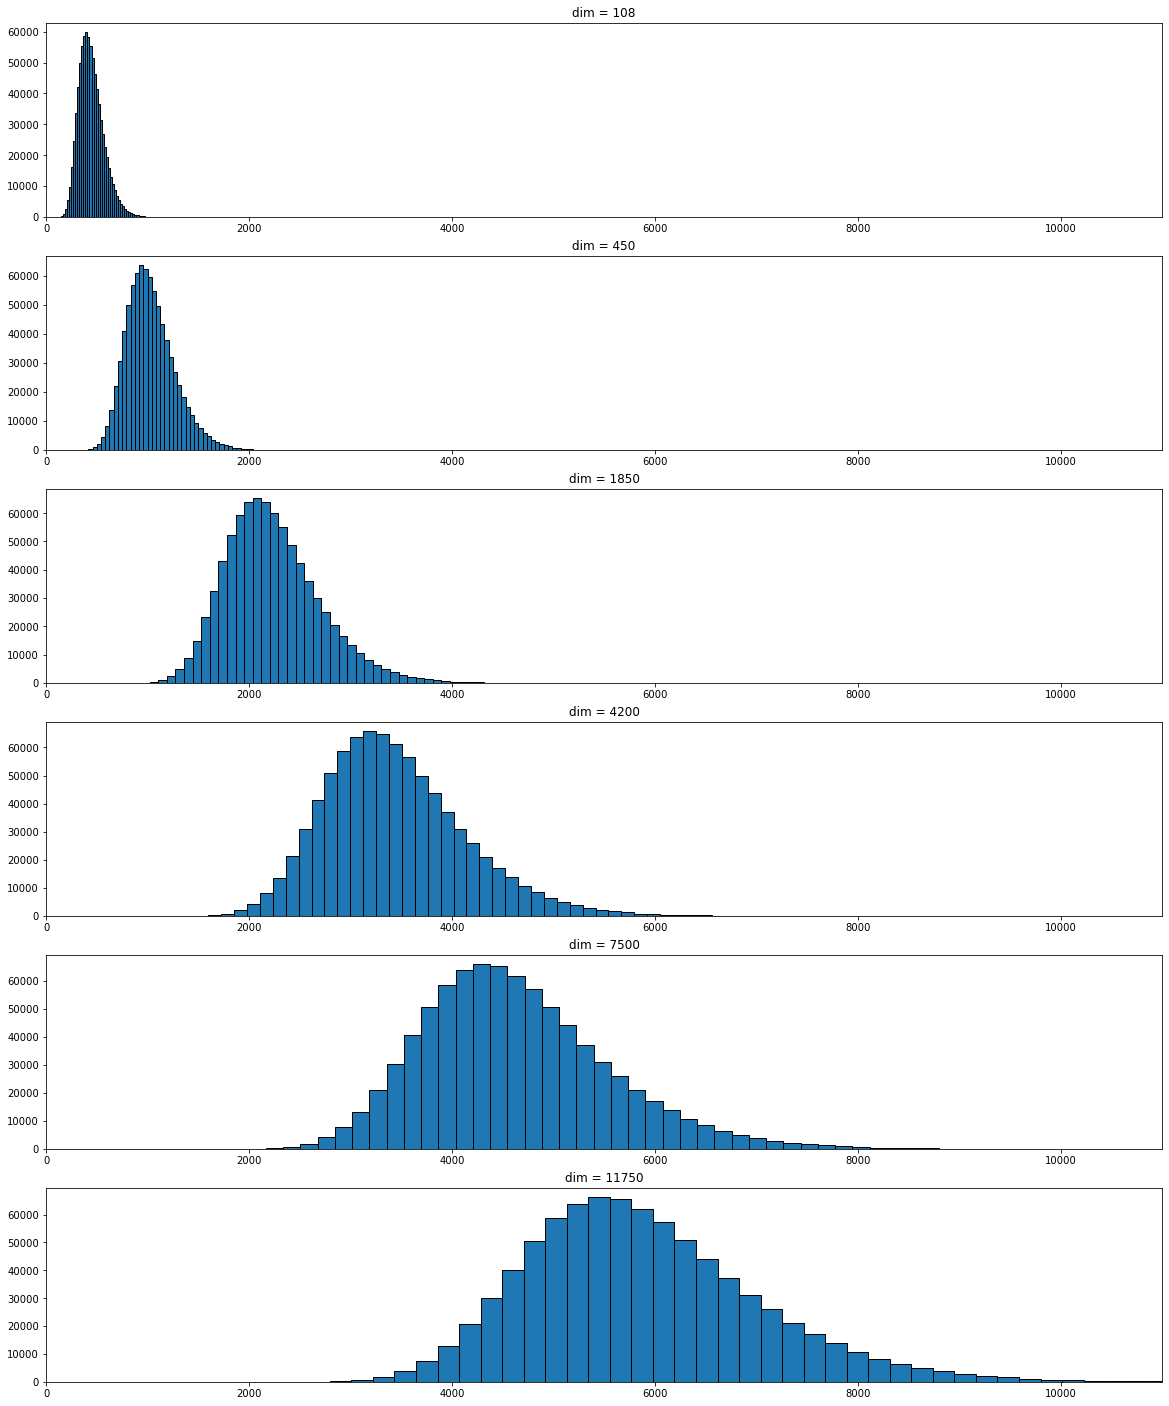

In [10]:
from sklearn.datasets import fetch_lfw_people
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

resize = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
dset = []

fig, axs = plt.subplots(len(resize), 1, figsize=(20,25))
distance_distribution2 = []

for i in range(len(resize)):
    print(resize[i])
    X_lfw = fetch_lfw_people(min_faces_per_person=70, resize=resize[i])['data']
    distdist = pdist(X_lfw, metric='euclidean') 
    distance_distribution2.append(distdist)

    axs[i].set_xlim(0, 11000)
    axs[i].set_title('dim = ' + str(X_lfw.shape[1]))
    axs[i].hist(distdist, bins=60, edgecolor='k')
    
plt.savefig('visuals/dim_dists-faces.png')
plt.show()

100%|██████████| 5/5 [00:00<00:00,  8.69it/s]


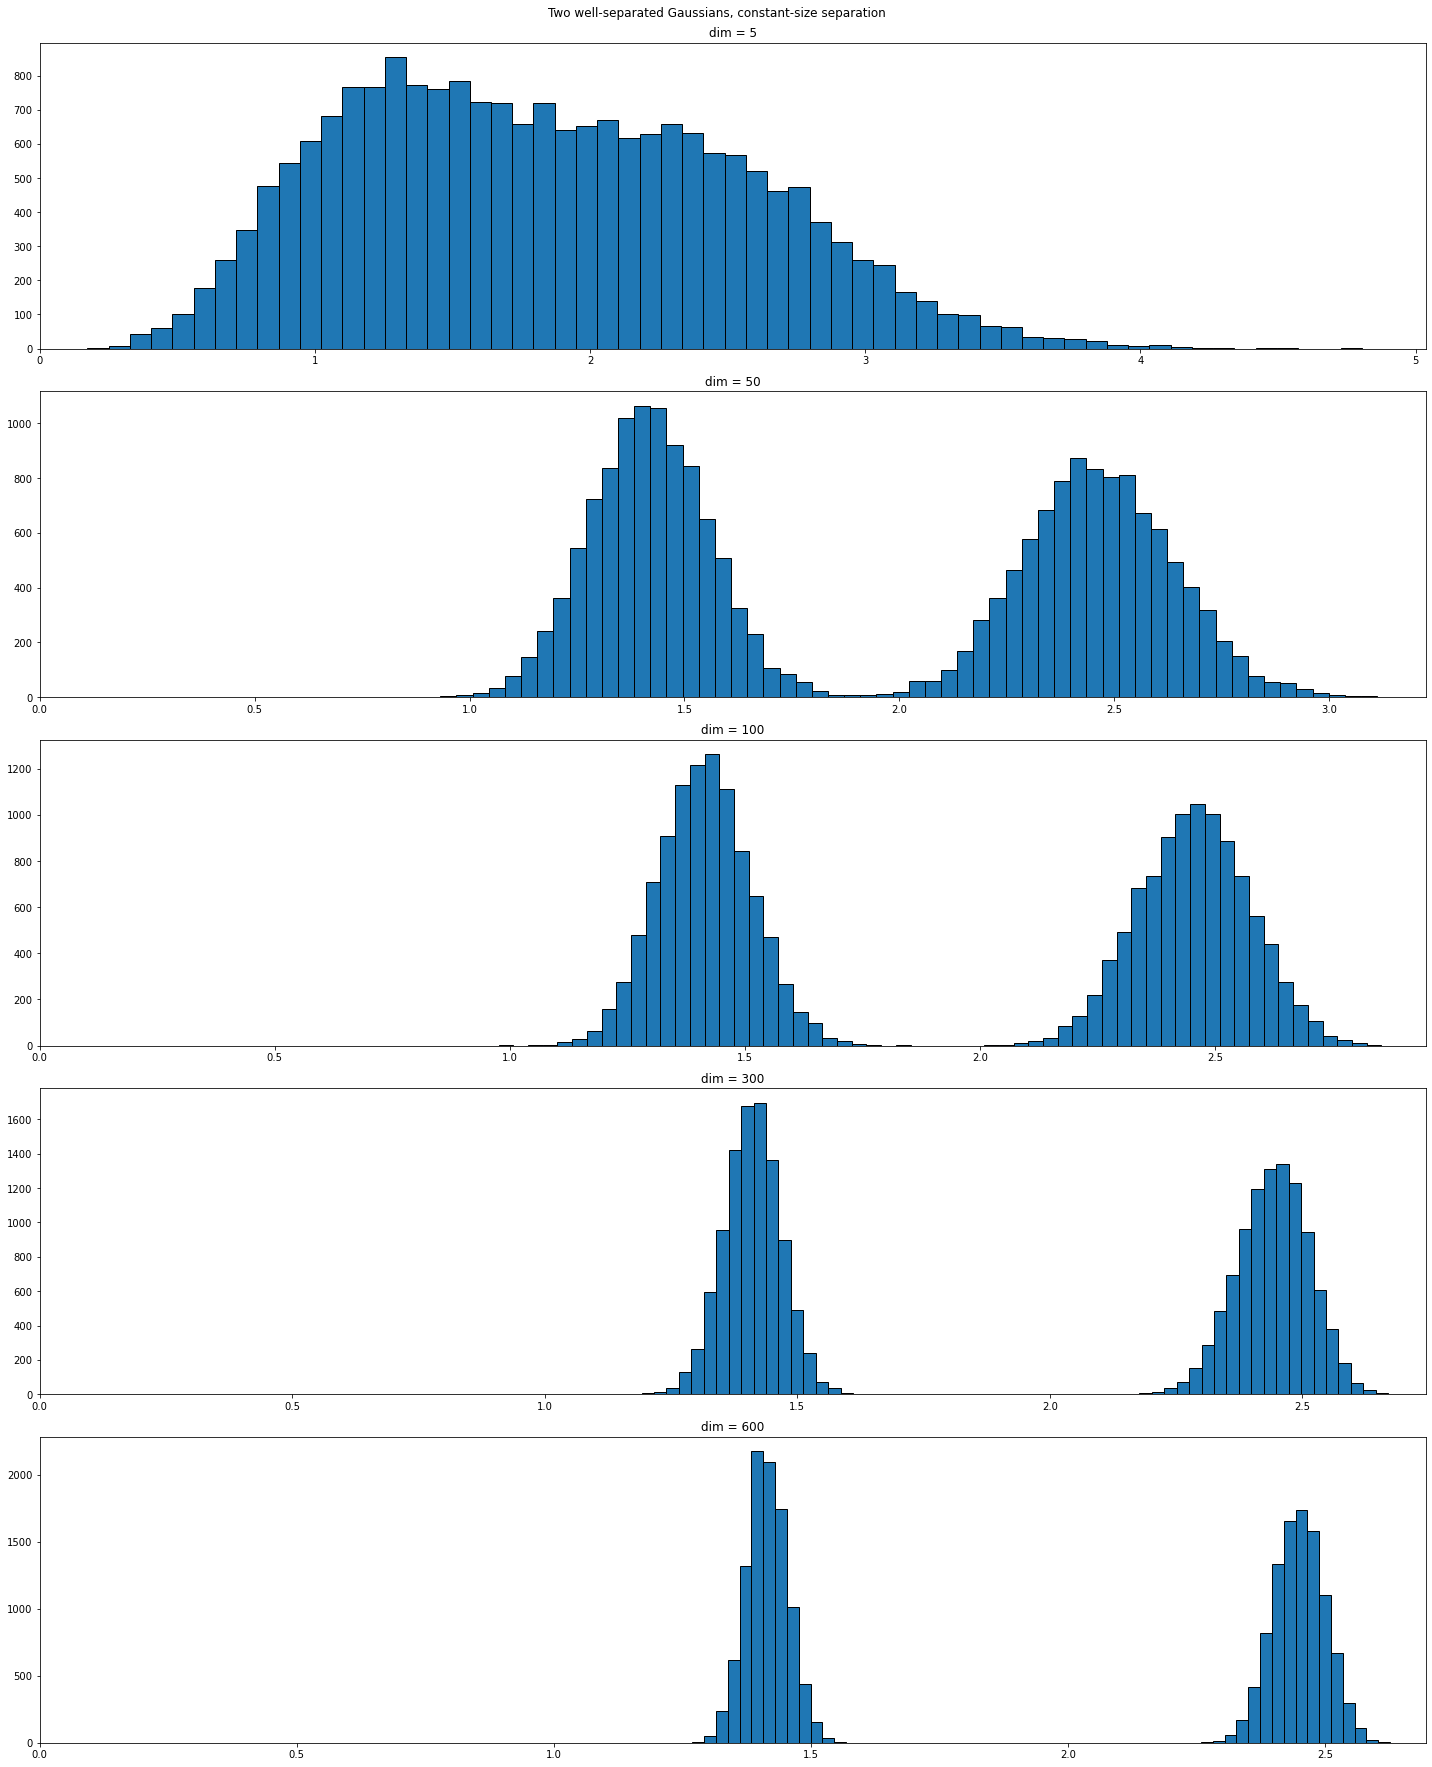

In [15]:
from sklearn.datasets import fetch_lfw_people
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from Functions import *
from tqdm import tqdm

dim = [5,50, 100, 300, 600]

fig, axs = plt.subplots(len(dim), 1, figsize=(20,25))

for i in tqdm(range(len(dim))):
    nper= 50

    X,y = randomGaussians2(dim[i], nper=100, scaling=1)
    distdist = pdist(X, metric='euclidean') 

    axs[i].set_title('dim = ' + str(dim[i]))
    axs[i].hist(distdist, bins=60, edgecolor='k')
    axs[i].set_xlim(0)

fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.suptitle('Two well-separated Gaussians, constant-size separation')    

plt.savefig('visuals/dim_dists-2gaussians-constscaling.png')
plt.show()

100%|██████████| 5/5 [00:00<00:00, 10.50it/s]


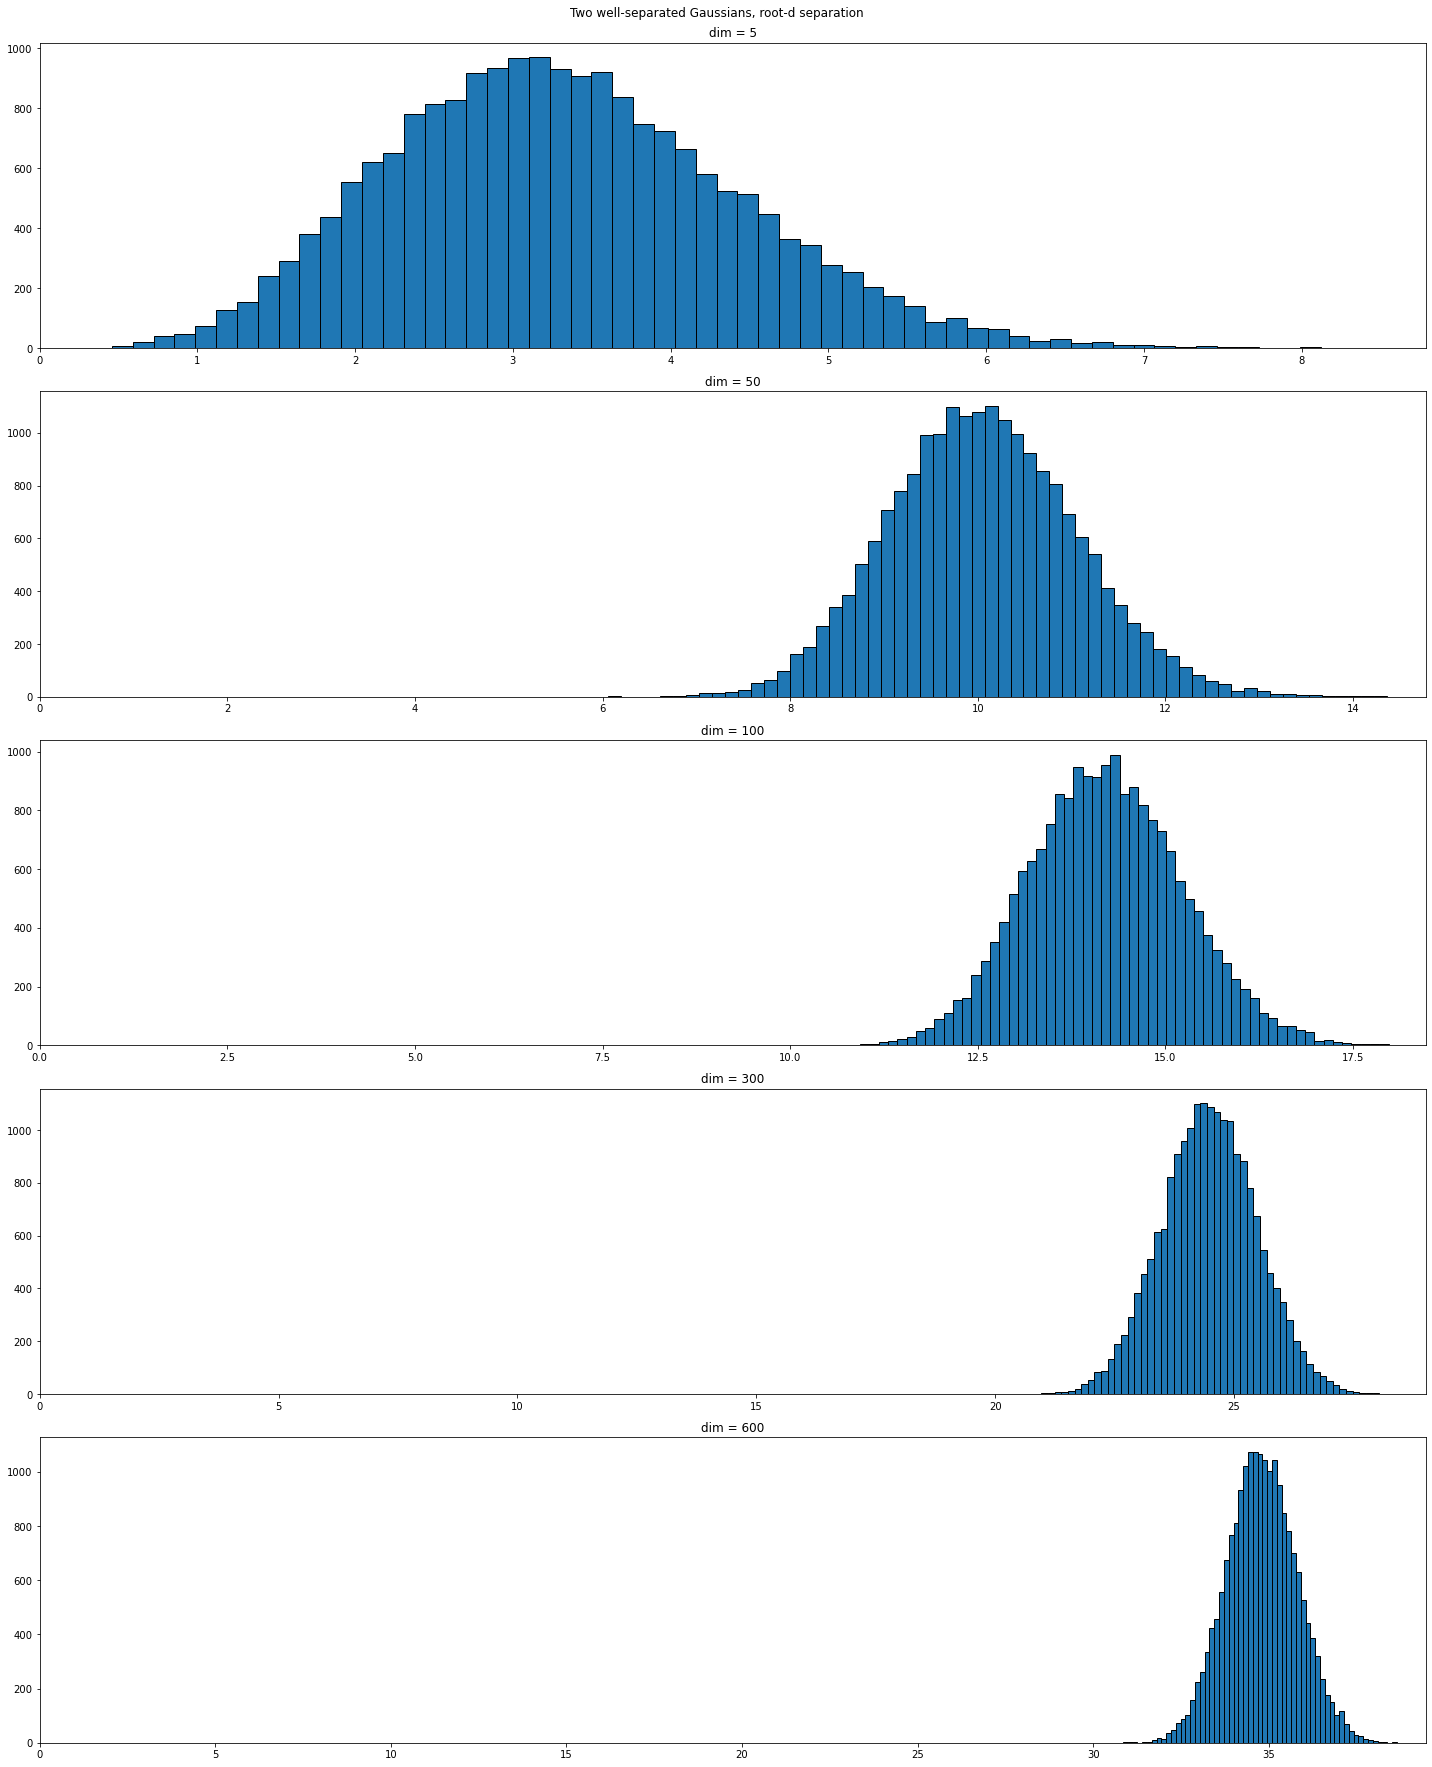

In [14]:
from sklearn.datasets import fetch_lfw_people
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from Functions import *
from tqdm import tqdm

dim = [5,50, 100, 300, 600]

fig, axs = plt.subplots(len(dim), 1, figsize=(20,25))

for i in tqdm(range(len(dim))):
    nper= 50

    X,y = randomGaussians2(dim[i], nper=100, scaling=dim[i]**0.5)
    distdist = pdist(X, metric='euclidean') 

    axs[i].set_title('dim = ' + str(dim[i]))
    axs[i].hist(distdist, bins=60, edgecolor='k')
    axs[i].set_xlim(0)

fig.suptitle('Two well-separated Gaussians, root-d separation')    
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.savefig('visuals/dim_dists-2gaussians-root-d-scaling.png')
plt.show()

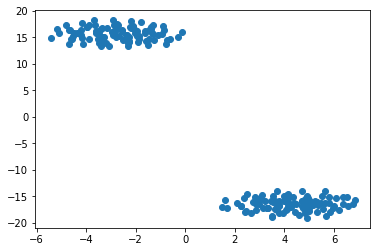

In [17]:
from sklearn.manifold import MDS, TSNE
tsne = TSNE(n_components=2, random_state=42, method='exact', perplexity=30)
X_tsne = tsne.fit_transform(X)

# demonstration that the root-d separated gaussians are still clustered per t-SNE visualization

plt.scatter(X_tsne[:,0],X_tsne[:,1])

{'edu': 12,
 'subject': 37,
 'organization': 27,
 'lines': 20,
 'nntp': 26,
 'posting': 29,
 'host': 16,
 'going': 14,
 'just': 17,
 'computer': 6,
 'university': 40,
 'does': 10,
 'right': 33,
 'reply': 32,
 'writes': 49,
 'use': 41,
 'said': 34,
 'new': 25,
 'like': 19,
 'people': 28,
 'say': 35,
 'time': 39,
 'don': 11,
 'know': 18,
 'com': 5,
 'article': 1,
 'ca': 4,
 'need': 24,
 've': 43,
 'want': 44,
 'way': 45,
 'make': 22,
 'think': 38,
 'used': 42,
 '10': 0,
 'work': 47,
 'cs': 7,
 'good': 15,
 'problem': 30,
 'max': 23,
 'did': 8,
 'believe': 3,
 'god': 13,
 'state': 36,
 'distribution': 9,
 'world': 48,
 'really': 31,
 'windows': 46,
 'mail': 21,
 'ax': 2}

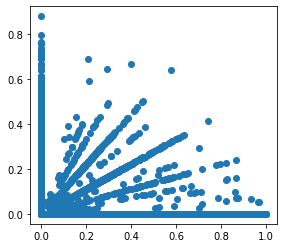

In [15]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 50, stop_words='english') # m
newsgroup_tfidf = vectorizer.fit_transform(X).toarray()
X = newsgroup_tfidf

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X[:,0], X[:,1])

vectorizer.vocabulary_

In [9]:
vectorizer.vocabulary_

18846

In [12]:
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [2]:
import pandas as pd

df = pd.read_csv('archive/mnist_train.csv')

In [6]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

df2 = df.sample(n=1000)
X = df2.iloc[:,1:]

In [7]:
dists = pdist(X, metric='euclidean')

(array([2.0000e+00, 6.0000e+00, 3.2000e+01, 9.7000e+01, 1.5400e+02,
        2.3600e+02, 3.3600e+02, 4.9200e+02, 6.7700e+02, 9.4800e+02,
        1.5660e+03, 2.6730e+03, 4.7490e+03, 8.6840e+03, 1.5839e+04,
        2.5982e+04, 3.9056e+04, 5.2440e+04, 6.3427e+04, 6.7974e+04,
        6.5273e+04, 5.5642e+04, 3.9350e+04, 2.5827e+04, 1.4924e+04,
        8.1380e+03, 3.5020e+03, 1.1560e+03, 2.8700e+02, 3.1000e+01]),
 array([ 278.16362091,  397.50796279,  516.85230466,  636.19664654,
         755.54098841,  874.88533029,  994.22967216, 1113.57401404,
        1232.91835591, 1352.26269778, 1471.60703966, 1590.95138153,
        1710.29572341, 1829.64006528, 1948.98440716, 2068.32874903,
        2187.67309091, 2307.01743278, 2426.36177466, 2545.70611653,
        2665.0504584 , 2784.39480028, 2903.73914215, 3023.08348403,
        3142.4278259 , 3261.77216778, 3381.11650965, 3500.46085153,
        3619.8051934 , 3739.14953527, 3858.49387715]),
 <BarContainer object of 30 artists>)

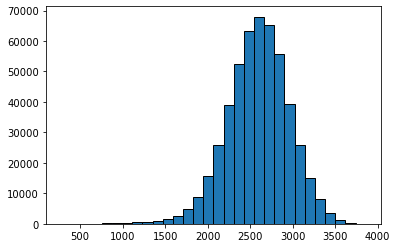

In [8]:
plt.hist(dists, bins=30, edgecolor='k')